In [1]:
# import random
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

In [25]:
min_nodes=4
max_nodes=50
num_graphs=1000000
np.random.seed(42) 

In [31]:
def constant_graphon(u, v):
    return 0.5

def linear_graphon(u, v):
    return (u*v)

def quadratic_graphon(u, v):
    return u**2 * v**2

def sigmoidal_graphon(u, v):
    return 1 / (1 + np.exp(-10*(u-v)))

def randomized_graphon(u, v):
    return np.random.rand()

def step_graphon(u, v):
    threshold = 0.5
    return 1 if u > threshold and v > threshold else 0

def sin_graphon(u, v):
    return np.sin( np.pi * u) * np.sin( np.pi * v)

def avg_graphon(u, v):
    return (u+v)/2

def exponential_decay_graphon(u, v):
    return np.exp(-(u**2 + v**2))

def checkerboard_graphon(u, v):
    return 1 if (u*10).astype(int) % 2 == (v*10).astype(int) % 2 else 0

def softmax_graphon(u, v):
    return np.exp(u) / (np.exp(u) + np.exp(v))

custom_graphons = [randomized_graphon,
    constant_graphon,
    linear_graphon,
    quadratic_graphon,
    sigmoidal_graphon,
    randomized_graphon,
    step_graphon,
    sin_graphon,
    avg_graphon,
    exponential_decay_graphon,
    checkerboard_graphon,
    softmax_graphon
]

In [27]:
def graphon_graph(n):
    """
    Generate a graphon graph with n nodes using the given graphon function w.
    Returns:
        G (nx.Graph): Graphon graph.
    """
    W= np.random.choice(custom_graphons)
    G = nx.Graph()
    G.add_nodes_from(range(n))
    U= np.random.rand(n)
    
    # Generate edges based on the graphon function
    for i in range(n):
        for j in range(i + 1, n):
            p = W(U[i], U[j])
            if np.random.rand() < p:
                G.add_edge(i, j)

    return G


In [34]:
graphs=[]
num_nodes=[]
for l in range(num_graphs):
    if l%10000==0:
        print(l)
    n = np.random.randint(min_nodes, max_nodes+1)
    if n<=6:
        n = np.random.randint(min_nodes, max_nodes+1)
    G = graphon_graph(n)
    graphs.append(G)
    num_nodes.append(n)

0
10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
140000
150000
160000
170000
180000
190000
200000
210000
220000
230000
240000
250000
260000
270000
280000
290000
300000
310000
320000
330000
340000
350000
360000
370000
380000
390000
400000
410000
420000
430000
440000
450000
460000
470000
480000
490000
500000
510000
520000
530000
540000
550000
560000
570000
580000
590000
600000
610000
620000
630000
640000
650000
660000
670000
680000
690000
700000
710000
720000
730000
740000
750000
760000
770000
780000
790000
800000
810000
820000
830000
840000
850000
860000
870000
880000
890000
900000
910000
920000
930000
940000
950000
960000
970000
980000
990000


In [35]:
# n = 5
# G = graphon_graph(n)
# pos = nx.spring_layout(G,seed=42)  # Positioning nodes
# nx.draw(G, pos,with_labels=True, node_color='skyblue', node_size=500, font_size=10, font_color='black')
# plt.show()

In [36]:
def analyze_node_distribution(num_nodes):
    # Basic statistics
    mean_nodes = np.mean(num_nodes)
    median_nodes = np.median(num_nodes)
    min_nodes = np.min(num_nodes)
    max_nodes = np.max(num_nodes)
    std_dev_nodes = np.std(num_nodes)
    
    # Histogram plot
    plt.hist(num_nodes, bins=20, edgecolor='black')
    plt.title('Distribution of Number of Nodes')
    plt.xlabel('Number of Nodes')
    plt.ylabel('Frequency')
    plt.show()
    
    # Print statistics
    print(f"Mean Number of Nodes: {mean_nodes}")
    print(f"Median Number of Nodes: {median_nodes}")
    print(f"Minimum Number of Nodes: {min_nodes}")
    print(f"Maximum Number of Nodes: {max_nodes}")
    print(f"Standard Deviation of Number of Nodes: {std_dev_nodes}")

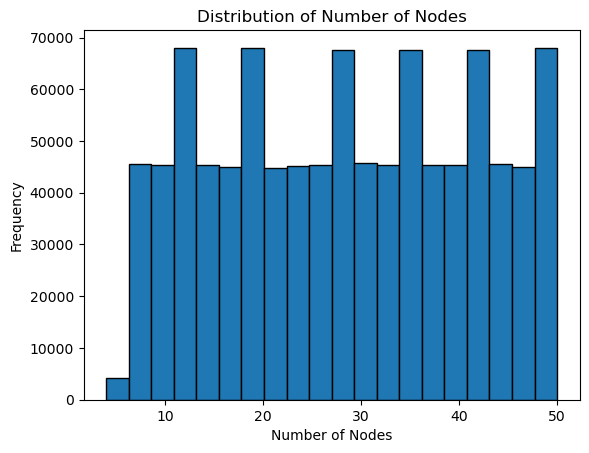

Mean Number of Nodes: 28.399071
Median Number of Nodes: 28.0
Minimum Number of Nodes: 4
Maximum Number of Nodes: 50
Standard Deviation of Number of Nodes: 12.768328055660186


In [37]:
analyze_node_distribution(num_nodes)

In [54]:
formatted_graphs ={}
for idx,G in enumerate(graphs):
    if idx%100000==0:
        print(idx)
    formatted_graphs[idx] = {node: list(G.neighbors(node))  for node in G.nodes()}



0


In [53]:
formatted_graphs[16]

{0: [13, 20],
 1: [2,
  7,
  8,
  9,
  10,
  11,
  13,
  14,
  16,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  28,
  29],
 2: [1, 7, 8, 10, 11, 13, 21, 22, 24, 25, 26, 29],
 3: [5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  15,
  16,
  18,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29],
 4: [6, 7, 8, 9, 10, 11, 12, 13, 18, 20, 21, 22, 23, 25, 26, 28, 29],
 5: [3,
  6,
  7,
  8,
  9,
  10,
  11,
  13,
  15,
  16,
  17,
  18,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29],
 6: [3,
  4,
  5,
  7,
  8,
  9,
  10,
  11,
  13,
  14,
  16,
  18,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  28,
  29],
 7: [1, 2, 3, 4, 5, 6, 8, 9, 11, 20, 21, 22, 26, 29],
 8: [1, 2, 3, 4, 5, 6, 7],
 9: [1, 3, 4, 5, 6, 7, 11, 20, 21, 22, 25, 26, 29],
 10: [1, 2, 3, 4, 5, 6, 11, 13, 18, 20, 21, 24, 25, 26, 28],
 11: [1, 2, 3, 4, 5, 6, 7, 9, 10, 24],
 12: [3, 4, 13, 14, 15, 16, 18, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29],
 13: [0, 1, 2, 3, 4, 5, 6, 10, 12, 16, 21, 22, 23, 24

In [ ]:
import json
with open("../data/Graphon/All_graphs.json",'w') as json_file:
    json.dump(formatted_graphs, json_file)